In [20]:
import numpy  as np
import pandas as pd


In [21]:
# Import data
#df = pd.read_csv("data1.txt") # Takes first data as header 
data = pd.read_csv('data1.txt', header=None)


In [23]:
print(data)

           0         1           2
0    0.00000  0.000000  350.000000
1    0.10101  0.096076  345.196196
2    0.20202  0.182922  340.853922
3    0.30303  0.261423  336.928835
4    0.40404  0.332383  333.380858
..       ...       ...         ...
95   9.59596  0.999932  300.003400
96   9.69697  0.999939  300.003074
97   9.79798  0.999944  300.002778
98   9.89899  0.999950  300.002511
99  10.00000  0.999955  300.002270

[100 rows x 3 columns]


In [33]:
# Time
t= data.loc[:, 0]

# Concentration
Ca = data.loc[:, 1]

# Temperature
T = data.loc[:, 2]

In [34]:
import matplotlib.pyplot as plt

Text(0,0.5,'Temperature')

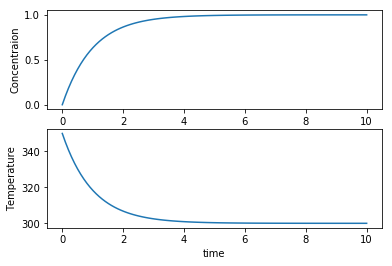

In [35]:
# Visualize data

plt.figure()
plt.subplot(2,1,1)
plt.plot(t,Ca)
plt.xlabel('time')
plt.ylabel('Concentraion')

plt.subplot(2,1,2)
plt.plot(t,T)
plt.xlabel('time')
plt.ylabel('Temperature')

Text(0,0.5,'Concentration')

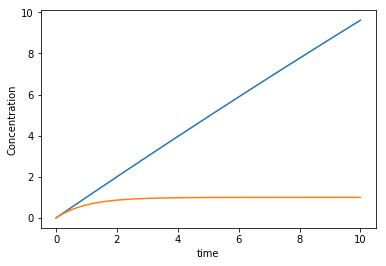

In [67]:
#Initial guess model

import numpy as np

def dpm(t,c0,c1,c2,c3):

    return c0+c1*t-c2*np.exp(-c3*t)

guess = [100,0.01,100,0.01] 

plt.figure()

n= len(t)
y = np.zeros(n)

for i in range(n):
    y[i] = dpm(t[i], guess[0],guess[1],guess[2],guess[3])

    
    
plt.plot(t,y)
# Data
plt.plot(t,Ca)
plt.xlabel('time')
plt.ylabel('Concentration')

[9.99999999e-01 3.71165899e-10 1.00000002e+00 1.00000004e+00]


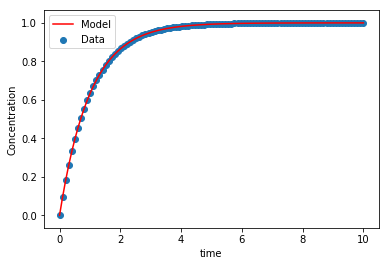

In [79]:
# Fit model
# Compute 
from scipy.optimize import curve_fit

c,cov = curve_fit(dpm,t,Ca,guess)  

# Parameters values
print(c)    

# cov is covariance

plt.figure()

n= len(t)
y = np.zeros(n)

for i in range(n):
    y[i] = dpm(t[i], c[0],c[1],c[2],c[3])


# Data
plt.scatter(t,Ca)
plt.xlabel('time')
plt.ylabel('Concentration')
   
# Model    
plt.plot(t,y,'r')
plt.hold
plt.legend(['Model','Data'])

In [80]:
# Calculate Rsquare
from sklearn.metrics import r2_score
print('R^2', r2_score(Ca,y))

R^2 0.9999999999999986
